# Ensemble Techniques​

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('Heart Attack.csv')
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [4]:
data.isnull().sum()


age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

923
396
923
396


In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("heart_attack_decision_tree.png")

True

In [9]:
y_pred = clf.predict(X_test)

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


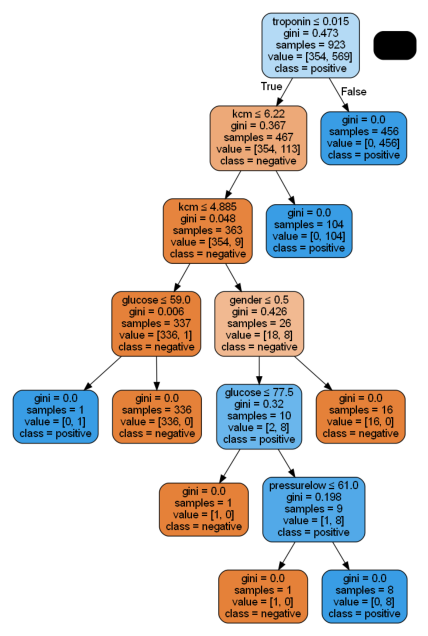

In [11]:
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("heart_attack_decision_tree.png"))
plt.axis('off')
plt.show()

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

In [13]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
rf_y_pred = rf_clf.predict(X_test)

In [15]:

rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')


print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


# Gradient Boosting

In [16]:
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=50, random_state=42)

In [17]:
gb_y_pred = gb_clf.predict(X_test)

In [18]:

gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')


print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


# Adaptive Boosting

In [19]:
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

c:\Users\MOHIT\anaconda3\envs\bia\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [20]:
ada_y_pred = ada_boost.predict(X_test)

In [21]:
ada_accuracy = metrics.accuracy_score(y_test, ada_y_pred)
ada_precision = metrics.precision_score(y_test, ada_y_pred, average='weighted')
ada_recall = metrics.recall_score(y_test, ada_y_pred, average='weighted')
ada_f1_score = metrics.f1_score(y_test, ada_y_pred, average='weighted')


print("\Adaptive Boosting Metrics:")
print(f"Accuracy: {ada_accuracy:.2f}")
print(f"Precision: {ada_precision:.2f}")
print(f"Recall: {ada_recall:.2f}")
print(f"F1 Score: {ada_f1_score:.2f}")

\Adaptive Boosting Metrics:
Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1 Score: 0.97


In [22]:
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"Adaptive Boosting Accuracy: {ada_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 0.98
Random Forest Accuracy: 0.98
Gradient Boosting Accuracy: 0.98
Adaptive Boosting Accuracy: 0.97
